In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [3]:
df = pd.read_csv('uber_raw.csv')
df

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512
...,...,...,...,...
652430,5/31/2014 23:45:00,40.7309,-74.0014,B02764
652431,5/31/2014 23:52:00,40.7528,-73.9798,B02764
652432,5/31/2014 23:55:00,40.7158,-73.9519,B02764
652433,5/31/2014 23:56:00,40.6961,-73.8997,B02764


In [4]:
df.shape

(652435, 4)

In [5]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [7]:
df.describe()

,Lat,Lon
count,652435.000000,652435.000000
mean,40.740072,-73.975004
std,0.037537,0.054165
min,40.106700,-74.929000
25%,40.722400,-73.997000
50%,40.743300,-73.983900
75%,40.761400,-73.968100
max,41.322500,-72.180100


In [35]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%y %h:%m:%s")
df['Dayofweeknum'] = df['Date/Time'].dt.dayofweek
df['DayofWeek'] = df['Date/Time'].dt.day_name()
df['MonthDayNum'] = df['Date/Time'].dt.day
df['HourDay'] = df['Date/Time'].dt.hour
df['MinofDay'] = df['Date/Time'].dt.minute
df.head()

,Date/Time,Lat,Lon,Base,Dayofweeknum,DayofWeek,MonthDayNum,HourDay,MinofDay
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512,3,Thursday,1,0,2
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512,3,Thursday,1,0,6
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512,3,Thursday,1,0,15
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512,3,Thursday,1,0,17
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512,3,Thursday,1,0,17


In [43]:
week = df.pivot_table(index=['DayofWeek'],values='Base',aggfunc='count')
week.head()

,Base
DayofWeek,
Friday,133991
Monday,63846
Saturday,102990
Sunday,56168
Thursday,128921


In [47]:
weekdayAverage = week/30
weekdayAverage.head()

,Base
DayofWeek,
Friday,4466.366667
Monday,2128.200000
Saturday,3433.000000
Sunday,1872.266667
Thursday,4297.366667


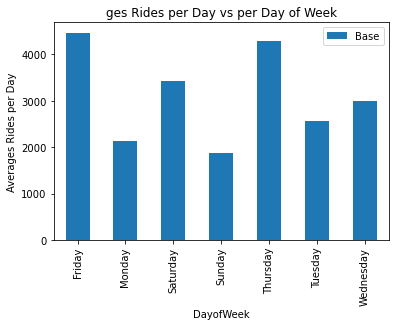

In [56]:
weekdayAverage.plot(kind='bar')
plt.ylabel('Averages Rides per Day')
plt.title('ges Rides per Day vs per Day of Week')
plt.show()

In [59]:
hours = df.pivot_table(index=['HourDay'], values='Base', aggfunc='count')
hours

,Base
HourDay,
0,13875
1,8186
2,5372
3,5946
4,6945
5,10789
6,21015
7,27413
8,25460


Text(0.5, 1.0, 'Number of Rides vs Hour per week')

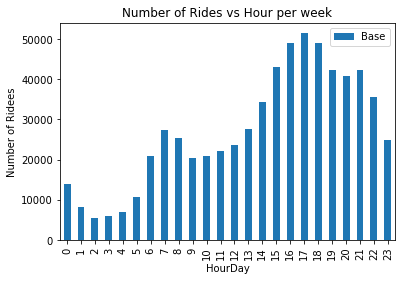

In [63]:
hours.plot(kind='bar')
plt.ylabel('Number of Ridees')
plt.title('Number of Rides vs Hour per week')

<AxesSubplot:xlabel='HourDay'>

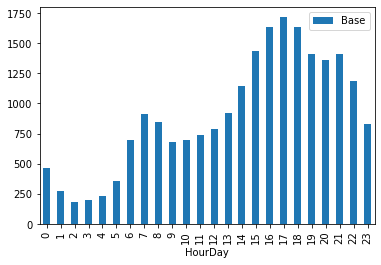

In [64]:
avghours = hours/30
avghours.plot(kind='bar')

In [66]:
min = df.pivot_table(index=['MinofDay'], values='Base', aggfunc='count')
min

,Base
MinofDay,
0,11166
1,10867
2,11098
3,10681
4,10955
5,11178
6,10860
7,10816
8,10884


In [71]:
min.max()

Base    11319
dtype: int64

In [72]:
min.min()

Base    10487
dtype: int64